In [ ]:
from pandas import read_csv
import seaborn as sns
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation

In [ ]:

dataset = read_csv('/content/african_countries_data.csv', header=0, index_col=0)

In [ ]:


import numpy as np


dataset['mean'] = np.mean(dataset.iloc[:, 2:], axis=1)


print(dataset)


             Country  Year  AFW agriculture  AFW domestic  AFW industry  \
Unnamed: 0                                                                
41           Algeria  2000        60.690898     30.459687      8.849415   
42           Algeria  2001        60.128774     31.407927      8.463299   
43           Algeria  2002        60.015000     31.968750      8.016250   
44           Algeria  2003        59.909770     32.487458      7.602772   
45           Algeria  2004        59.812156     32.968623      7.219220   
...              ...   ...              ...           ...           ...   
2779        Zimbabwe  2016        79.989417     17.617662      2.392921   
2780        Zimbabwe  2017        82.956485     14.605732      2.437783   
2781        Zimbabwe  2018        80.635426     17.207487      2.157087   
2782        Zimbabwe  2019        80.635426     17.207487      2.157087   
2783        Zimbabwe  2020        80.635426     17.207487      2.157087   

            Water stress

#Dataset Overview

In [ ]:
dataset

,Country,Year,AFW agriculture,AFW domestic,AFW industry,Water stress,Water Use Efficiency,mean
Unnamed: 0,,,,,,,,
41,Algeria,2000,60.690898,30.459687,8.849415,79.261164,15.150000,38.882233
42,Algeria,2001,60.128774,31.407927,8.463299,81.710520,14.910770,39.324258
43,Algeria,2002,60.015000,31.968750,8.016250,85.037372,15.009380,40.009350
44,Algeria,2003,59.909770,32.487458,7.602772,87.522801,15.491520,40.602864
45,Algeria,2004,59.812156,32.968623,7.219220,90.008229,15.692205,41.140087
...,...,...,...,...,...,...,...,...
2779,Zimbabwe,2016,79.989417,17.617662,2.392921,31.937664,4.911550,27.369843
2780,Zimbabwe,2017,82.956485,14.605732,2.437783,31.346226,5.209605,27.311166
2781,Zimbabwe,2018,80.635426,17.207487,2.157087,35.405385,4.830090,28.047095


In [ ]:
dataset.describe()

,Year,AFW agriculture,AFW domestic,AFW industry,Water stress,Water Use Efficiency,mean
count,906.000000,906.000000,906.000000,906.000000,906.000000,890.000000,906.000000
mean,2010.348786,62.892496,28.316983,8.781410,34.013661,17.264207,30.283950
std,6.039628,27.633859,21.024486,10.409349,114.535810,23.290644,23.048733
min,2000.000000,0.551724,0.354241,0.000000,0.161260,0.130390,20.346988
25%,2005.000000,40.659341,10.546875,2.032403,1.560430,3.530779,22.630608
50%,2010.500000,69.791667,23.131094,4.923025,7.474572,8.807335,24.873494
75%,2016.000000,85.937500,45.662100,10.136592,20.198675,19.510779,29.226993
max,2020.000000,99.625430,84.210526,45.662100,817.142857,151.749795,187.247882


In [ ]:
dataset.isnull().sum()

,0
Country,0
Year,0
AFW agriculture,0
AFW domestic,0
AFW industry,0
Water stress,0
Water Use Efficiency,16
mean,0


In [ ]:
dataset.isna().sum()

,0
Country,0
Year,0
AFW agriculture,0
AFW domestic,0
AFW industry,0
Water stress,0
Water Use Efficiency,16
mean,0


In [ ]:
dataset.nunique()

,0
Country,47
Year,21
AFW agriculture,431
AFW domestic,431
AFW industry,430
Water stress,417
Water Use Efficiency,889
mean,893


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset = dataset.fillna(0)

In [ ]:
dataset.isnull().sum()

,0
Country,0
Year,0
AFW agriculture,0
AFW domestic,0
AFW industry,0
Water stress,0
Water Use Efficiency,0
mean,0


In [ ]:
values = dataset.values

In [ ]:
values

array([['Algeria', 2000, 60.6908979743, ..., 79.2611637694, 15.15,
        38.88223275388],
       ['Algeria', 2001, 60.1287737874, ..., 81.7105201445, 14.91077,
        39.3242580289],
       ['Algeria', 2002, 60.015, ..., 85.0373724582, 15.00938,
        40.00935049164],
       ...,
       ['Zimbabwe', 2018, 80.6354257516, ..., 35.405385383, 4.83009,
        28.0470950766],
       ['Zimbabwe', 2019, 80.6354257516, ..., 35.405385383, 4.445295,
        27.970136076599992],
       ['Zimbabwe', 2020, 80.6354257516, ..., 35.405385383, 4.47,
        27.975077076599995]], dtype=object)

In [ ]:
countries=values[:,0]

<Axes: >

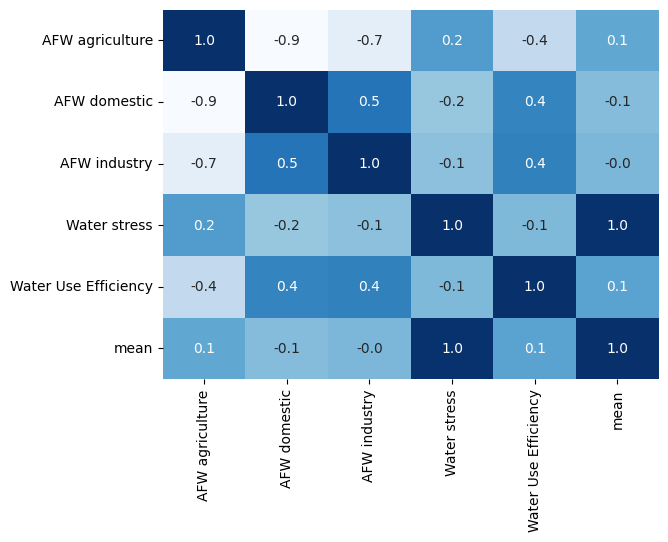

In [ ]:
sns.heatmap(dataset.iloc[:,2:].corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [ ]:
print('lol')

lol


#Multiple Features Forecasting

##Preprocessing 2

In [ ]:
def SeparateCountries(dataframe):
  values=dataframe.values
  countries=values[:,0]
  countries=list(set(countries))
  countries.sort()
  i=1
  sep_values=[]
  eachcount=[]
  for country in values:

    if country[0]!=countries[i]:
      eachcount.append(country.tolist())
    else:
      sep_values.append(eachcount)
      eachcount=[]
      i=i+1
      if(i>=len(countries)):

        break
  return sep_values

In [ ]:
sep=SeparateCountries(dataset)

In [ ]:
def series_to_supervised(data, n_lag=1, n_lead=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 for i in range(n_lag, 0, -1):
  cols.append(df.shift(i))
  names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 for i in range(0, n_lead):
  cols.append(df.shift(-i))
  if i == 0:
    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
  else:
    names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 if dropnan:
  agg.dropna(inplace=True)
 return agg

In [ ]:
def sep2(data,lag,futuretime,features):
  values=data
  l=0
  x_arr=[]
  y_arr=[]
  while(l<values.shape[0]):
    timestep=[]
    timestep2=[]
    i=0
    k=0
    #while (k<values.shape[0]):
      #for i in range(lag):
    while (i<lag):
        line=[]
        for j in range(features):
          line.append(values[l,i+k+j])
        timestep.append(line)
        k+=features-1
        i+=1
    i=0
    k=0
    while(i<futuretime):
      line=[]
      for j in range(features):

        line.append(values[l,features*lag+i+k+j])
      timestep2.append(line)
      k+=features-1
      i+=1
    l+=1
    x_arr.append(timestep)
    y_arr.append(timestep2)

  return np.array(x_arr),np.array(y_arr)



##Second model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(10, 6)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(6))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##training on all countries

####first train try

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

non_used_countries=0
standard_scaler = StandardScaler()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
for i in range(1,len(sep)):
  print("---------County num: ",i)
  country_case=np.array(sep[i][:])[:,2:]
  scalar = standard_scaler.fit(country_case)
  scaled_train_df = scalar.transform(country_case)
  reframed = series_to_supervised(scaled_train_df,4,10)
  reframed_values = reframed.values.astype(np.float32)
  train_x2,train_y2=sep2(reframed.values,10,1,6)
  if(len(train_x2)<2):
    non_used_countries+=1
    continue
  history = model.fit(train_x2 , train_y2 , epochs=56, verbose=1,callbacks=[early_stopping])

---------County num:  1
Epoch 1/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4086 - mae: 0.5926
Epoch 2/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3935 - mae: 0.5818
Epoch 3/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3779 - mae: 0.5704
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3620 - mae: 0.5585
Epoch 5/56


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3459 - mae: 0.5460
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3296 - mae: 0.5328
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3127 - mae: 0.5181
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2947 - mae: 0.5016
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2756 - mae: 0.4830
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2556 - mae: 0.4617
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2350 - mae: 0.4366
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2151 - mae: 0.4138
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1979 - mae: 0.3949
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1855 - mae: 0.3817
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1754 - mae: 0.3695
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1624 - mae: 0.3525
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1453 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5331 - mae: 0.6223
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5047 - mae: 0.6068
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4762 - mae: 0.5910
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4489 - mae: 0.5761
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4235 - mae: 0.5613
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4004 - mae: 0.5471
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3792 - mae: 0.5329
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3596 - mae: 0.5186
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3410 - mae: 0.5037
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3232 - mae: 0.4880
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3062 - mae: 0.4727
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2899 - mae: 0.4563
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2744 - mae

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8720 - mae: 0.7873
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8574 - mae: 0.7794
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8435 - mae: 0.7720
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8302 - mae: 0.7655
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.8172 - mae: 0.7592
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8046 - mae: 0.7528
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7925 - mae: 0.7467
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7813 - mae: 0.7406
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.7714 - mae: 0.7349
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7632 - mae: 0.7297
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7568 - mae: 0.7252
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.7516 - mae: 0.7207
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7470 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.5058 - mae: 0.6187
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3733 - mae: 0.5119
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2894 - mae: 0.4317
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2382 - mae: 0.3777
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.2070 - mae: 0.3559
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1881 - mae: 0.3515
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1764 - mae: 0.3510
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1690 - mae: 0.3517
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1641 - mae: 0.3515
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1607 - mae: 0.3506
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1579 - mae: 0.3490
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1555 - mae: 0.3467
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1532 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3754 - mae: 0.5737
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3511 - mae: 0.5570
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3304 - mae: 0.5419
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3126 - mae: 0.5282
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2972 - mae: 0.5156
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2838 - mae: 0.5041
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2719 - mae: 0.4934
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2610 - mae: 0.4833
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2509 - mae: 0.4736
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2415 - mae: 0.4641
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2325 - mae: 0.4549
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2241 - mae: 0.4459
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2159 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0865 - mae: 0.1896
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0845 - mae: 0.1873
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0822 - mae: 0.1846
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0797 - mae: 0.1819
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0772 - mae: 0.1791
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0745 - mae: 0.1759
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0717 - mae: 0.1725
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0689 - mae: 0.1688
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0660 - mae: 0.1651
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0631 - mae: 0.1619
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0603 - mae: 0.1590
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0574 - mae: 0.1564
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0547 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3180 - mae: 0.5031
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2911 - mae: 0.4864
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.2700 - mae: 0.4734
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.2533 - mae: 0.4617
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2397 - mae: 0.4516
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2282 - mae: 0.4421
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2181 - mae: 0.4330
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2089 - mae: 0.4242
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2004 - mae: 0.4155
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1924 - mae: 0.4069
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.1846 - mae: 0.3982
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1769 - mae: 0.3892
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1693 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6758 - mae: 0.5793
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6598 - mae: 0.5772
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6461 - mae: 0.5747
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6344 - mae: 0.5717
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6247 - mae: 0.5682
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6165 - mae: 0.5641
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6095 - mae: 0.5595
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6032 - mae: 0.5543
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5977 - mae: 0.5484
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5928 - mae: 0.5422
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5883 - mae: 0.5354
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5838 - mae: 0.5276
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5795 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1615 - mae: 0.2906
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1508 - mae: 0.2780
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1408 - mae: 0.2659
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1315 - mae: 0.2560
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1229 - mae: 0.2480
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1148 - mae: 0.2406
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1075 - mae: 0.2337
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1004 - mae: 0.2260
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0933 - mae: 0.2174
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0862 - mae: 0.2080
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0791 - mae: 0.1975
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0719 - mae: 0.1863
Epoch 18/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1205 - mae: 0.3034
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1174 - mae: 0.2969
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1142 - mae: 0.2898
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1111 - mae: 0.2825
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1081 - mae: 0.2751
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1052 - mae: 0.2676
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1024 - mae: 0.2600
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0998 - mae: 0.2525
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0974 - mae: 0.2449
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0951 - mae: 0.2374
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0929 - mae: 0.2299
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0909 - mae: 0.2225
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0891 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1532 - mae: 0.3515
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1490 - mae: 0.3455
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1446 - mae: 0.3388
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1400 - mae: 0.3316
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1353 - mae: 0.3238
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1307 - mae: 0.3154
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1260 - mae: 0.3065
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1215 - mae: 0.2972
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1172 - mae: 0.2876
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1130 - mae: 0.2777
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1090 - mae: 0.2676
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1051 - mae: 0.2576
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1015 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1129 - mae: 0.2820
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1016 - mae: 0.2684
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0913 - mae: 0.2549
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0820 - mae: 0.2419
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0736 - mae: 0.2293
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0661 - mae: 0.2174
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0592 - mae: 0.2059
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0529 - mae: 0.1947
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0471 - mae: 0.1839
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0418 - mae: 0.1733
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0371 - mae: 0.1628
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0328 - mae: 0.1524
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0291 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5248 - mae: 0.6351
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4959 - mae: 0.6184
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4673 - mae: 0.6009
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4392 - mae: 0.5826
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4109 - mae: 0.5635
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3825 - mae: 0.5430
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3538 - mae: 0.5214
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3245 - mae: 0.4983
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2927 - mae: 0.4714
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2569 - mae: 0.4379
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2183 - mae: 0.3951
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1817 - mae: 0.3562
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1610 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4098 - mae: 0.5691
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3806 - mae: 0.5478
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3513 - mae: 0.5250
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3243 - mae: 0.5026
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3005 - mae: 0.4816
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2797 - mae: 0.4635
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2618 - mae: 0.4484
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2462 - mae: 0.4348
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.2324 - mae: 0.4230
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2206 - mae: 0.4123
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2099 - mae: 0.4020
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2002 - mae: 0.3920
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1914 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4785 - mae: 0.5409
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4575 - mae: 0.5269
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4358 - mae: 0.5115
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4138 - mae: 0.4944
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3914 - mae: 0.4761
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3686 - mae: 0.4588
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3456 - mae: 0.4416
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3231 - mae: 0.4276
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.3031 - mae: 0.4165
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2881 - mae: 0.4113
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2808 - mae: 0.4136
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2808 - mae: 0.4186
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2805 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2476 - mae: 0.4213
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2428 - mae: 0.4183
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2370 - mae: 0.4146
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2305 - mae: 0.4105
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2233 - mae: 0.4058
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2160 - mae: 0.4009
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2086 - mae: 0.3960
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2016 - mae: 0.3912
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1954 - mae: 0.3863
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1904 - mae: 0.3813
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1866 - mae: 0.3760
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1840 - mae: 0.3708
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1816 - m

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.1634 - mae: 0.3725
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.1539 - mae: 0.3631
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1433 - mae: 0.3521
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1325 - mae: 0.3401
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1219 - mae: 0.3275
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1119 - mae: 0.3145
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1028 - mae: 0.3018
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0946 - mae: 0.2893
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0872 - mae: 0.2770
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0801 - mae: 0.2642
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0732 - mae: 0.2508
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0664 - mae: 0.2363
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0596 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9627 - mae: 0.8310
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9562 - mae: 0.8261
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.9495 - mae: 0.8211
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9429 - mae: 0.8159
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9365 - mae: 0.8106
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9303 - mae: 0.8054
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.9244 - mae: 0.8005
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.9188 - mae: 0.7972
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.9135 - mae: 0.7950
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.9083 - mae: 0.7937
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9034 - mae: 0.7926
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8987 - mae: 0.7918
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.8942 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1488 - mae: 0.2932
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1442 - mae: 0.2899
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1392 - mae: 0.2862
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1338 - mae: 0.2822
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1283 - mae: 0.2779
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1227 - mae: 0.2734
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1171 - mae: 0.2686
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1117 - mae: 0.2637
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1064 - mae: 0.2584
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1012 - mae: 0.2528
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0961 - mae: 0.2468
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0910 - mae: 0.2403
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0861 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.2610 - mae: 0.3186
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.2204 - mae: 0.2910
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.1970 - mae: 0.2820
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1856 - mae: 0.2782
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1813 - mae: 0.2822
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1808 - mae: 0.2889
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1820 - mae: 0.2963
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1836 - mae: 0.3020
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1851 - mae: 0.3058
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1859 - mae: 0.3072
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1862 - mae: 0.3064
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1857 - mae: 0.3037
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.18

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6917 - mae: 0.7367
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6557 - mae: 0.7178
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6197 - mae: 0.6973
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5850 - mae: 0.6744
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5520 - mae: 0.6485
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5199 - mae: 0.6186
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4895 - mae: 0.5845
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4584 - mae: 0.5458
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4248 - mae: 0.5030
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.3880 - mae: 0.4592
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.3486 - mae: 0.4128
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3073 - mae: 0.3801
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2663 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1496 - mae: 0.3302
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1314 - mae: 0.3058
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1163 - mae: 0.2834
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1050 - mae: 0.2658
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0963 - mae: 0.2521
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0889 - mae: 0.2407
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0826 - mae: 0.2304
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0770 - mae: 0.2201
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0723 - mae: 0.2098
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0683 - mae: 0.1995
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0649 - mae: 0.1895
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0623 - mae: 0.1802
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0603 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0637 - mae: 0.1695
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0628 - mae: 0.1656
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0619 - mae: 0.1611
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0611 - mae: 0.1564
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0604 - mae: 0.1516
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0599 - mae: 0.1477
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0595 - mae: 0.1452
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0592 - mae: 0.1440
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0591 - mae: 0.1443
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0590 - mae: 0.1447
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0590 - mae: 0.1452
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0590 - mae: 0.1458
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0590 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2007 - mae: 0.3840
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1951 - mae: 0.3755
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1894 - mae: 0.3663
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1837 - mae: 0.3569
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1779 - mae: 0.3475
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1721 - mae: 0.3378
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1662 - mae: 0.3279
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1603 - mae: 0.3180
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1542 - mae: 0.3078
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1481 - mae: 0.2973
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1418 - mae: 0.2866
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1354 - mae: 0.2755
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1289 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.1881 - mae: 0.3428
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1767 - mae: 0.3392
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1670 - mae: 0.3369
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1585 - mae: 0.3341
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1508 - mae: 0.3304
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1437 - mae: 0.3259
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1370 - mae: 0.3204
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1304 - mae: 0.3143
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1240 - mae: 0.3073
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1174 - mae: 0.2995
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1109 - mae: 0.2912
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.1042 - mae: 0.2823
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1827 - mae: 0.3626
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1690 - mae: 0.3465
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1543 - mae: 0.3289
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1402 - mae: 0.3117
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1281 - mae: 0.2979
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1196 - mae: 0.2870
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1157 - mae: 0.2826
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1172 - mae: 0.2872
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1224 - mae: 0.2939
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1268 - mae: 0.2984
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1264 - mae: 0.2970
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1214 - mae: 0.2907
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.11

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9008 - mae: 0.8633
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8320 - mae: 0.8377
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.7705 - mae: 0.8134
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.7169 - mae: 0.7914
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6697 - mae: 0.7709
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6283 - mae: 0.7517
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5917 - mae: 0.7330
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.5597 - mae: 0.7143
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.5303 - mae: 0.6939
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4995 - mae: 0.6695
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4652 - mae: 0.6391
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4252 - mae: 0.5994
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3783 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6975 - mae: 0.7427
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.6535 - mae: 0.7185
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6145 - mae: 0.6970
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5800 - mae: 0.6776
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.5487 - mae: 0.6593
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5200 - mae: 0.6418
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4936 - mae: 0.6250
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4698 - mae: 0.6092
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4480 - mae: 0.5940
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4272 - mae: 0.5790
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4069 - mae: 0.5637
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3865 - mae: 0.5475
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3656 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.2613 - mae: 0.4219
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2475 - mae: 0.4083
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2332 - mae: 0.3934
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2195 - mae: 0.3789
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2068 - mae: 0.3646
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1953 - mae: 0.3517
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1850 - mae: 0.3406
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1758 - mae: 0.3310
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1675 - mae: 0.3227
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1601 - mae: 0.3152
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1532 - mae: 0.3086
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1469 - mae: 0.3025
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1408 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3479 - mae: 0.4649
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3265 - mae: 0.4442
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3043 - mae: 0.4223
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2829 - mae: 0.4026
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2634 - mae: 0.3859
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2470 - mae: 0.3744
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2344 - mae: 0.3692
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2262 - mae: 0.3683
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2212 - mae: 0.3698
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2179 - mae: 0.3720
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2139 - mae: 0.3711
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2081 - mae: 0.3665
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2006 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2937 - mae: 0.4896
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2672 - mae: 0.4684
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2414 - mae: 0.4476
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2176 - mae: 0.4291
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1960 - mae: 0.4118
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1767 - mae: 0.3946
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1592 - mae: 0.3772
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1429 - mae: 0.3592
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1274 - mae: 0.3400
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1125 - mae: 0.3195
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0979 - mae: 0.2969
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0840 - mae: 0.2719
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0711 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.3570 - mae: 0.4998
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 0.3483 - mae: 0.4944
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.3380 - mae: 0.4879
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.3272 - mae: 0.4810
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.3157 - mae: 0.4738
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.3035 - mae: 0.4660
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.2910 - mae: 0.4577
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2783 - mae: 0.4494
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2659 - mae: 0.4407
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2541 - mae: 0.4325
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2430 - mae: 0.4252
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.2330 - mae: 0.4176
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5593 - mae: 0.6150
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5182 - mae: 0.5754
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4852 - mae: 0.5397
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4588 - mae: 0.5083
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4377 - mae: 0.4809
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4204 - mae: 0.4572
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.4056 - mae: 0.4377
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.3926 - mae: 0.4216
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3807 - mae: 0.4079
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3695 - mae: 0.3962
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3588 - mae: 0.3856
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3485 - mae: 0.3752
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3385 -

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0508 - mae: 0.1744
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0490 - mae: 0.1688
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0472 - mae: 0.1626
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0455 - mae: 0.1563
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0438 - mae: 0.1500
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0424 - mae: 0.1439
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0412 - mae: 0.1380
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0402 - mae: 0.1326
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0393 - mae: 0.1277
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0387 - mae: 0.1233
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0382 - mae: 0.1195
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0378 - mae: 0.1164
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0376 - 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.8719 - mae: 0.8015
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.8633 - mae: 0.8008
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.8540 - mae: 0.8005
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.8449 - mae: 0.8008
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.8364 - mae: 0.8012
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.8289 - mae: 0.8019
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.8223 - mae: 0.8026
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.8168 - mae: 0.8033
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.8123 - mae: 0.8039
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8084 - mae: 0.8045
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8052 - mae: 0.8049
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.8022 - mae: 0.8052
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.7994

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1735 - mae: 0.2829
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1704 - mae: 0.2778
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.1673 - mae: 0.2726
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1644 - mae: 0.2683
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1618 - mae: 0.2645
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1594 - mae: 0.2608
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1573 - mae: 0.2572
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1554 - mae: 0.2536
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1537 - mae: 0.2501
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1523 - mae: 0.2468
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1510 - mae: 0.2438
Epoch 16/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1499 - mae: 0.2409
Epoch 17/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1490 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5092 - mae: 0.5544
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5064 - mae: 0.5533
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5031 - mae: 0.5521
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4993 - mae: 0.5506
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4952 - mae: 0.5490
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4909 - mae: 0.5473
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.4867 - mae: 0.5456
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4824 - mae: 0.5439
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4782 - mae: 0.5421
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4741 - mae: 0.5404
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4701 - mae: 0.5387
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4661 - mae: 0.5370
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4623 - ma

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1518 - mae: 0.3530
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1438 - mae: 0.3416
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1346 - mae: 0.3275
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1249 - mae: 0.3111
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1153 - mae: 0.2954
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1061 - mae: 0.2801
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0975 - mae: 0.2633
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0897 - mae: 0.2469
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0830 - mae: 0.2320
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0773 - mae: 0.2191
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0725 - mae: 0.2084
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0687 - mae: 0.2005
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.065

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1461 - mae: 0.3051
Epoch 4/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1418 - mae: 0.3001
Epoch 5/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1370 - mae: 0.2943
Epoch 6/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1324 - mae: 0.2884
Epoch 7/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1281 - mae: 0.2826
Epoch 8/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1242 - mae: 0.2771
Epoch 9/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1205 - mae: 0.2719
Epoch 10/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1172 - mae: 0.2669
Epoch 11/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1139 - mae: 0.2621
Epoch 12/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1108 - mae: 0.2574
Epoch 13/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1078 - mae: 0.2528
Epoch 14/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1049 - mae: 0.2484
Epoch 15/56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1021 - mae

In [ ]:
train_x2

array([[[ 3.17551878, -3.17551878, -3.17551878, -3.13049517,
         -1.94607868, -1.94813184],
        [ 2.21753271, -2.21753271, -2.21753271, -2.23606798,
         -1.62010007, -1.62134394],
        [ 1.29636191, -1.29636191, -1.29636191, -1.34164079,
         -1.5908816 , -1.59102893],
        [ 0.40992417, -0.40992417, -0.40992417, -0.4472136 ,
         -1.37875035, -1.37797819],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
         -1.03454883, -1.03298502],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
         -0.74140156, -0.7401215 ],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
         -0.26939379, -0.26857062],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
          0.04653846,  0.04705583],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
          0.01652386,  0.01707028],
        [-0.4437086 ,  0.4437086 ,  0.4437086 ,  0.4472136 ,
          0.25337474,  0.25369189]],

       [[ 2.21753271, -2.217

In [ ]:
country_case=np.array(traindata[1][:])[:,2:]
standard_scaler = StandardScaler()
scalar = standard_scaler.fit(country_case)
scaled_train_df = scalar.transform(country_case)
reframed = series_to_supervised(scaled_train_df,4,10)
train_x2,train_y2=sep2(reframed.values,4,10,6)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_r1=[]
test_r2=[]
testdata=sep[int(len(sep)*0.8):]
for i in range(1,len(testdata)):
  print("---------County num: ",i)
  country_case=np.array(testdata[i][:])[:,2:]
  print("feat:",country_case)
  scaled_test_df = scalar.transform(country_case)
  reframed = series_to_supervised(scaled_test_df,4,10)
  test_x2,test_y2=sep2(reframed.values,10,1,6)
  if test_x2.size==0:
    continue

  pred=model.predict(test_x2)
  accuracy = np.mean(np.abs(pred - test_y2) / test_y2) * 100

  if pred.shape!=(7,6):
    continue

  result_case=np.concatenate((test_x2, pred.reshape(7,-1,6)), axis=1)
  result_case=result_case[:,6:]
  unscaled_pred=scalar.inverse_transform(result_case.reshape(-1, country_case.shape[1]))

  print("testy:",test_y2)
  print("prediction:",pred)
  test_r1.append(( mean_squared_error(test_y2.reshape(7,6),pred)))
  test_r2.append((r2_score(test_y2.reshape(7,6),pred)))
  print("unscaled: ",unscaled_pred)

print(np.mean(test_r1))
print(np.mean(test_r2))


---------County num:  1
feat: [['23.6102500517' '50.9402769167' '25.4494730316' '0.4522429907'
  '4.532565' '20.99696159814']
 ['23.0551912017' '51.3066289981' '25.6381798002' '0.4631308411'
  '5.561389999999999' '21.20490416822']
 ['22.5256309148' '51.6561514196' '25.8182176656' '0.4740186916'
  '5.96801' '21.288405738319998']
 ['22.0198515949' '51.9899778356' '25.9901705695' '0.4849065421'
  '6.06637' '21.31025530842']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '6.35885' '21.370928878500006']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '6.24396' '21.347950878500004']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '6.53422' '21.406002878500004']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '6.675645' '21.434287878500005']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '6.620075' '21.423173878500005']
 ['21.5362865221' '52.3091423186' '26.1545711593' '0.4957943925'
  '7.26911499

In [ ]:
test_r1

[('---------County num: 1',
  array([[-1.2279041 ,  1.0891435 , -0.22459646,  0.327905  ,  0.53880703,
           0.3027715 ],
         [-0.9156752 ,  0.95256484, -0.2320062 ,  0.4021744 ,  0.70952   ,
           0.4786199 ],
         [-0.73766524,  0.8421933 , -0.28763995,  0.39869404,  0.92246825,
           0.6355278 ],
         [-0.6143022 ,  0.7375926 , -0.30075264,  0.3940819 ,  1.0575788 ,
           0.77836543],
         [-0.5483783 ,  0.6561143 , -0.21158141,  0.42463195,  0.9889029 ,
           0.8243146 ],
         [-0.49950343,  0.5818659 , -0.06095553,  0.46602595,  0.7598448 ,
           0.78730243],
         [-0.43017778,  0.46267006,  0.12420829,  0.5276395 ,  0.44473755,
           0.6948417 ]], dtype=float32),
  0.13253948198578436),
 ('---------County num: 2',
  array([[  -2.3572698 ,   -5.180319  ,    8.445716  ,   -4.3326573 ,
          -109.67059   ,  -22.49595   ],
         [  -2.356318  ,  -21.211145  ,    6.5656114 ,    6.9910502 ,
          -103.67347   ,  -34

In [ ]:
train_x2

array([[[-0.17801519,  0.08581451, -0.06471763,  2.21177303,
         -1.62828981, -0.53751198],
        [-0.46813539,  0.42285778,  0.17036252,  1.80073854,
         -1.49601563, -0.5777282 ],
        [-0.79230346,  0.7994557 ,  0.43303115,  1.38970406,
         -1.33244778, -0.60221209],
        [-1.15688669,  1.22300538,  0.72844759,  0.97866958,
         -1.12390692, -0.60408659]],

       [[-0.46813539,  0.42285778,  0.17036252,  1.80073854,
         -1.49601563, -0.5777282 ],
        [-0.79230346,  0.7994557 ,  0.43303115,  1.38970406,
         -1.33244778, -0.60221209],
        [-1.15688669,  1.22300538,  0.72844759,  0.97866958,
         -1.12390692, -0.60408659],
        [-1.43763548,  1.5351978 ,  0.9795492 ,  0.37308316,
         -0.84362679, -0.62040595]],

       [[-0.79230346,  0.7994557 ,  0.43303115,  1.38970406,
         -1.33244778, -0.60221209],
        [-1.15688669,  1.22300538,  0.72844759,  0.97866958,
         -1.12390692, -0.60408659],
        [-1.43763548,  1.5

In [ ]:
import joblib

joblib.dump(standard_scaler, 'standard_scaler.pkl')
model.save('af.keras')

###after train

In [ ]:
traindata[0]

[['Afghanistan',
  2000,
  98.606201344,
  0.7602538124,
  0.6335448436,
  54.7570194384,
  0.177885,
  30.986980887679998],
 ['Afghanistan',
  2001,
  98.5185761701,
  0.8080493617,
  0.6733744681,
  54.7570194384,
  0.172085,
  30.985820887660005],
 ['Afghanistan',
  2002,
  98.431106592,
  0.8557600407,
  0.7131333673,
  54.7570194384,
  0.271465,
  31.005696887680006],
 ['Afghanistan',
  2003,
  98.3437921956,
  0.9033860751,
  0.7528217293,
  54.7570194384,
  0.301035,
  31.01161088768],
 ['Afghanistan',
  2004,
  98.2566325683,
  0.95092769,
  0.7924397417,
  54.7570194384,
  0.3417,
  31.01974388768],
 ['Afghanistan',
  2005,
  98.169627299,
  0.9983851096,
  0.8319875914,
  54.7570194384,
  0.350005,
  31.02140488768],
 ['Afghanistan',
  2006,
  98.169627299,
  0.9983851096,
  0.8319875914,
  54.7570194384,
  0.3802,
  31.02744388768],
 ['Afghanistan',
  2007,
  98.169627299,
  0.9983851096,
  0.8319875914,
  54.7570194384,
  0.467555,
  31.04491488768],
 ['Afghanistan',
  2008

In [ ]:

standard_scaler = StandardScaler()
scalar = standard_scaler.fit(np.array(traindata[1][:])[:,2:])
scaled_train_df = scalar.transform(country_case)
reframed = series_to_supervised(scaled_train_df,4,10)
train_x2,train_y2=sep2(reframed.values,4,10,6)

In [ ]:
reframed

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),...,var3(t+8),var4(t+8),var5(t+8),var6(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9)


KeyError: 'val_loss'

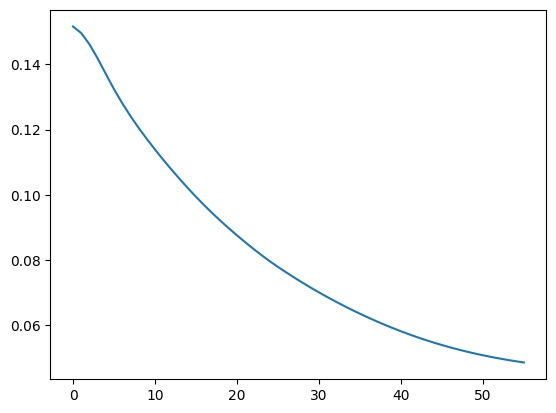

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.legend()
plt.show()


In [ ]:
print("trained on: ",len(traindata)-non_used_countries, "countries")
print("non used countries: ",non_used_countries)

trained on:  32 countries
non used countries:  4


In [ ]:
reframed

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),...,var3(t+8),var4(t+8),var5(t+8),var6(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9)
4,-0.24789,0.696673,-0.902898,0.925826,-1.347207,-1.271645,-0.838465,1.070196,-0.231209,0.548727,...,0.440202,-0.949205,1.259578,1.133362,0.217839,-1.059399,1.548693,-1.554974,2.364888,2.179618


In [ ]:
train_x2

array([[[-0.24788991,  0.69667274, -0.90289798,  0.92582608,
         -1.34720689, -1.27164454],
        [-0.83846527,  1.070196  , -0.2312089 ,  0.54872696,
         -0.67329976, -0.63482985],
        [-1.52781289,  1.50619009,  0.5528185 ,  0.17162784,
          0.02238019,  0.02426522],
        [-1.220581  ,  1.09983668,  0.63591717, -0.10144891,
          0.45394497,  0.42765362]]])

In [ ]:
train_y2

array([], dtype=float64)

In [ ]:
sep[-1]

[['Zambia',
  2001,
  73.6305132632,
  18.2075027468,
  8.16198399,
  2.8657106782,
  4.061265,
  21.385395135640003],
 ['Zambia',
  2002,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  4.357735,
  21.4386465671],
 ['Zambia',
  2003,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  4.665175,
  21.5001345671],
 ['Zambia',
  2004,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  5.01754,
  21.5706075671],
 ['Zambia',
  2005,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  5.450745,
  21.6572485671],
 ['Zambia',
  2006,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  6.00758,
  21.768615567100003],
 ['Zambia',
  2007,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  6.5945350000000005,
  21.886006567100004],
 ['Zambia',
  2008,
  73.2824427481,
  18.4478371501,
  8.2697201018,
  2.8354978355,
  7.14684,
  21.9964675671],
 ['Zambia',
  2009,
  73.2824427481,
  18.4478371501

In [ ]:
test_afgh_case_x.shape

(4, 1, 6)

In [ ]:
dataset

,Country,Year,AFW agriculture,AFW domestic,AFW industry,Water stress,Water Use Efficiency,mean
0,Afghanistan,2000,98.606201,0.760254,0.633545,54.757019,0.177885,30.986981
1,Afghanistan,2001,98.518576,0.808049,0.673374,54.757019,0.172085,30.985821
2,Afghanistan,2002,98.431107,0.855760,0.713133,54.757019,0.271465,31.005697
3,Afghanistan,2003,98.343792,0.903386,0.752822,54.757019,0.301035,31.011611
4,Afghanistan,2004,98.256633,0.950928,0.792440,54.757019,0.341700,31.019744
...,...,...,...,...,...,...,...,...
2779,Zimbabwe,2016,79.989417,17.617662,2.392921,31.937664,4.911550,27.369843
2780,Zimbabwe,2017,82.956485,14.605732,2.437783,31.346226,5.209605,27.311166
2781,Zimbabwe,2018,80.635426,17.207487,2.157087,35.405385,4.830090,28.047095
2782,Zimbabwe,2019,80.635426,17.207487,2.157087,35.405385,4.445295,27.970136


In [ ]:
test_afgh_case_x=np.array([
[87.9614046898,	4.3307528329,	4.0839223606,	68.7412587413,	0.772155,	33.17789],
[81.083552406,	3.7261401303	,3.8747285404	,57.7186963979	,0.8825350000000001	,29.4571304],
[64.9223835754,	7.2108162243	,26.0891337006	,52.6982451511	,1.048	,30.3937157302],
[76.295746 ,  5.923504 , 10.037681 , 62.83854  ,  0.9100075,31.734371 ],
[87.9614046898,	4.3307528329,	4.0839223606,	68.7412587413,	0.772155,	33.17789],
[81.083552406,	3.7261401303	,3.8747285404	,57.7186963979	,0.8825350000000001	,29.4571304],
[64.9223835754,	7.2108162243	,26.0891337006	,52.6982451511	,1.048	,30.3937157302],
[76.295746 ,  5.923504 , 10.037681 , 62.83854  ,  0.9100075,31.734371 ],
[76.295746 ,  5.923504 , 10.037681 , 62.83854  ,  0.9100075,31.734371 ],
[76.295746 ,  5.923504 , 10.037681 , 62.83854  ,  0.9100075,31.734371 ]])
scalar = standard_scaler.fit(test_afgh_case_x)
scaled_test_df = scalar.transform(test_afgh_case_x)
scaled_test_df = scaled_test_df.reshape((-1, 10, 6))
y_pred=model.predict(scaled_test_df)
y_pred=scalar.inverse_transform(y_pred)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[72.53045  ,  6.374742 ,  8.900779 , 64.243546 ,  0.9735633,
        32.164135 ]], dtype=float32)

In [ ]:
testdata

[[['Sao Tome and Principe',
   2017,
   62.5916870416,
   35.9413202934,
   1.466992665,
   1.876146789,
   7.51899,
   21.879027357800002],
  ['Sao Tome and Principe',
   2018,
   62.5916870416,
   35.9413202934,
   1.466992665,
   1.876146789,
   7.69004,
   21.9132373578],
  ['Sao Tome and Principe',
   2019,
   62.5916870416,
   35.9413202934,
   1.466992665,
   1.876146789,
   7.79329,
   21.9338873578],
  ['Sao Tome and Principe',
   2020,
   62.5916870416,
   35.9413202934,
   1.466992665,
   1.876146789,
   7.92,
   21.9592293578]],
 [['Saudi Arabia',
   2001,
   87.8743485956,
   10.393147396,
   1.7325040084,
   832.6442708333,
   17.110635000000002,
   189.95098116666],
  ['Saudi Arabia',
   2002,
   88.0144249701,
   9.9183183764,
   2.0672566535,
   847.7802083333,
   16.330095,
   192.82206066666],
  ['Saudi Arabia',
   2003,
   88.149460599,
   9.4605764088,
   2.3899629922,
   858.1661458333,
   17.81168,
   195.19556516666],
  ['Saudi Arabia',
   2004,
   88.2797227652

In [ ]:
model.save('lstmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x = int(98.6)
x

98

In [ ]:
x.shape

(4, 6)

In [ ]:
x=np.array([[-1.20362123,  1.20362123,  1.20362123, -1.24316309, -1.52819881,
        -1.47967633],
       [-0.88645358,  0.88645358,  0.88645358, -0.950742  , -0.95493734,
        -0.98368314],
       [-0.58154155,  0.58154155,  0.58154155, -0.6583209 , -0.36170146,
        -0.47386826],
       [-0.28818827,  0.28818827,  0.28818827, -0.3658998 ,  0.1442999 ,
        -0.02441709]])
x = x.reshape((1, 4, 6))
y_pred=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


In [ ]:
y_pred=model.predict(train_x2)

1/1 [==============================] - 0s 92ms/step


In [ ]:
train_y2

array([[[-1.43763548,  1.5351978 ,  0.9795492 ,  0.37308316,
         -0.84362679, -0.62040595],
        [-1.24180168,  1.29339308,  0.84504724,  0.25693556,
         -0.64922631, -0.55282936],
        [-1.03806447,  1.04182966,  0.70511708,  0.14078797,
         -0.43182874, -0.4736914 ],
        [-0.82593553,  0.77990461,  0.55942334,  0.02464037,
         -0.21392162, -0.39429727],
        [-0.6048855 ,  0.5069643 ,  0.40760245, -0.09150723,
         -0.07152896, -0.35286669],
        [-0.37433953,  0.22229892,  0.24925958, -0.20765482,
          0.05437163, -0.3197272 ],
        [-0.13367229, -0.07486365,  0.08396525, -0.32380242,
          0.13496961, -0.30936279],
        [ 0.11779769, -0.38536483, -0.08874858, -0.43995001,
          0.23892662, -0.28725504],
        [ 0.38081444, -0.71012334, -0.26939293, -0.55609761,
          0.36133509, -0.25587115],
        [ 1.54826002, -0.40974773,  0.04546236, -1.28545557,
          1.03983501,  2.77539902]],

       [[-1.24180168,  1.293

In [ ]:
y_pred

array([[-0.55407363,  0.31454754,  0.3681734 , -0.08172895,  0.09290159,
        -0.18759917],
       [-0.538819  ,  0.2869451 ,  0.3324129 , -0.17342368,  0.29273364,
        -0.06349082],
       [-0.39846367,  0.11695376,  0.17883186, -0.23381847,  0.44611216,
         0.04989028],
       [-0.21573108, -0.09737771,  0.04626618, -0.20587492,  0.5123309 ,
         0.12462436],
       [-0.0869402 , -0.22987615, -0.03638249, -0.15563226,  0.53533727,
         0.17889239],
       [-0.0474682 , -0.2263943 , -0.09718688, -0.07747144,  0.587019  ,
         0.2681675 ]], dtype=float32)

In [ ]:
y_pred.shape

(1, 6)

In [ ]:
y_pred=model.predict(test_afgh_case_x)

1/1 [==============================] - 0s 19ms/step


In [ ]:
y_pred=scalar.inverse_transform(y_pred)

In [ ]:
y_pred

array([[47.518726 , 37.873375 , 15.524913 ,  9.064508 ,  3.7714255,
        22.542646 ]], dtype=float32)

In [ ]:
y_pred[:,0]

array([49.81537 , 50.117462, 50.358562, 50.46736 ], dtype=float32)

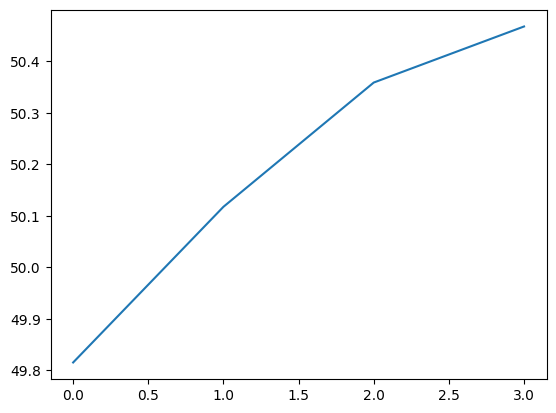

In [ ]:
# prompt: plot y_pred[:,0]

import matplotlib.pyplot as plt
plt.plot(y_pred[:,0])
plt.show()

true_yval=np.array([[40.6783923547,41.9020449223,17.419562723,7.6467548077,4.891075],
[42.5729719333,40.4763812974,16.9506467694,7.4984375,5.37177],
[44.5440125587,38.9931810377,16.4628064036,7.3501201923,5.909330000000001],
[46.596238255,37.4488893339,15.9548724111,7.2018028846,6.44815]])



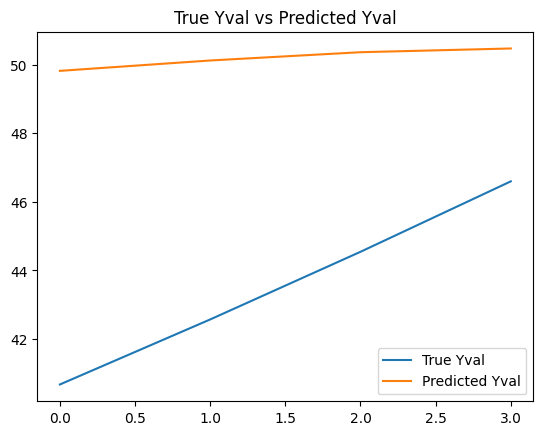

In [ ]:
# prompt: plot true_yval and y_pred

import matplotlib.pyplot as plt
# Plot true_yval and y_pred
plt.plot(true_yval[:, 0], label='True Yval')
plt.plot(y_pred[:, 0], label='Predicted Yval')
plt.title('True Yval vs Predicted Yval')
plt.legend()
plt.show()


In [ ]:
y_pred2=scalar.inverse_transform(y_pred)

In [ ]:
y_pred2

array([[76.09412  ,  5.740794 ,  9.743428 , 61.290817 ,  0.9363335,
        31.562918 ]], dtype=float32)

In [ ]:
train_y2

array([[['40.6783923547', '41.9020449223', '17.419562723',
         '7.6467548077', '4.891075', '22.507565961540003'],
        ['42.5729719333', '40.4763812974', '16.9506467694', '7.4984375',
         '5.37177', '22.574041500019998'],
        ['44.5440125587', '38.9931810377', '16.4628064036',
         '7.3501201923', '5.909330000000001', '22.651890038459996'],
        ['46.596238255', '37.4488893339', '15.9548724111',
         '7.2018028846', '6.44815', '22.72999057692'],
        ['48.7347703843', '35.8396523814', '15.4255772344',
         '7.0534855769', '6.800245', '22.7707461154'],
        ['50.9651703191', '34.1612852692', '14.8735444118',
         '6.9051682692', '7.111560000000001', '22.80334565386'],
        ['53.293487735', '32.4092356405', '14.2972766245',
         '6.7568509615', '7.310855', '22.8135411923'],
        ['55.7263154066', '30.5785424586', '13.6951421348',
         '6.6085336538', '7.56791', '22.83528873076'],
        ['58.2708515507', '28.6637890938', '13.065359

In [ ]:
reframed.iloc[:,30:]

,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2),...,var3(t+8),var4(t+8),var5(t+8),var6(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9)
4,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.350005,31.02140488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.64903,31.08120988768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.69007,31.089417887679996
5,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.3802,31.02744388768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.69007,31.089417887679996,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.72984,31.097371887679998
6,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.467555,31.04491488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.72984,31.097371887679998,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.7300599999999999,31.09741588768
7,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.46858,31.04511988768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.7300599999999999,31.09741588768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.751055,31.10161488768
8,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.5100899999999999,31.053421887679995,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.751055,31.10161488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.7710250000000001,31.10560888768
9,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.53893,31.05918988768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.7710250000000001,31.10560888768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8004100000000001,31.111485887679997
10,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.598425,31.07108888768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.8004100000000001,31.111485887679997,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8190949999999999,31.115222887679998
11,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.64903,31.08120988768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.8190949999999999,31.115222887679998,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8,31.11140388768


In [ ]:
reframed

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),...,var3(t+8),var4(t+8),var5(t+8),var6(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9),var5(t+9),var6(t+9)
4,98.606201344,0.7602538124,0.6335448436,54.7570194384,0.177885,30.986980887679998,98.5185761701,0.8080493617,0.6733744681,54.7570194384,...,0.8319875914,54.7570194384,0.64903,31.08120988768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.69007,31.089417887679996
5,98.5185761701,0.8080493617,0.6733744681,54.7570194384,0.172085,30.985820887660005,98.431106592,0.8557600407,0.7131333673,54.7570194384,...,0.8319875914,54.7570194384,0.69007,31.089417887679996,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.72984,31.097371887679998
6,98.431106592,0.8557600407,0.7131333673,54.7570194384,0.271465,31.005696887680006,98.3437921956,0.9033860751,0.7528217293,54.7570194384,...,0.8319875914,54.7570194384,0.72984,31.097371887679998,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.7300599999999999,31.09741588768
7,98.3437921956,0.9033860751,0.7528217293,54.7570194384,0.301035,31.01161088768,98.2566325683,0.95092769,0.7924397417,54.7570194384,...,0.8319875914,54.7570194384,0.7300599999999999,31.09741588768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.751055,31.10161488768
8,98.2566325683,0.95092769,0.7924397417,54.7570194384,0.3417,31.01974388768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.751055,31.10161488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.7710250000000001,31.10560888768
9,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.350005,31.02140488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.7710250000000001,31.10560888768,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8004100000000001,31.111485887679997
10,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.3802,31.02744388768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.8004100000000001,31.111485887679997,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8190949999999999,31.115222887679998
11,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.467555,31.04491488768,98.169627299,0.9983851096,0.8319875914,54.7570194384,...,0.8319875914,54.7570194384,0.8190949999999999,31.115222887679998,98.169627299,0.9983851096,0.8319875914,54.7570194384,0.8,31.11140388768


In [ ]:
n_lag=5

reframed= reframed.drop(reframed.iloc[:,[i for i in range(dataset.shape[1]*(n_lag+1),reframed.shape[1],dataset.shape[1])]],axis=1)

In [ ]:
reframed

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),...,var6(t+7),var2(t+8),var3(t+8),var4(t+8),var6(t+8),var1(t+9),var2(t+9),var4(t+9),var5(t+9),var6(t+9)
4,98.606201,0.760254,0.633545,54.757019,0.177885,30.986981,98.518576,0.808049,0.673374,54.757019,...,31.071089,0.998385,0.831988,54.757019,31.08121,98.169627,0.998385,54.757019,0.69007,31.089418
5,98.518576,0.808049,0.673374,54.757019,0.172085,30.985821,98.431107,0.85576,0.713133,54.757019,...,31.08121,0.998385,0.831988,54.757019,31.089418,98.169627,0.998385,54.757019,0.72984,31.097372
6,98.431107,0.85576,0.713133,54.757019,0.271465,31.005697,98.343792,0.903386,0.752822,54.757019,...,31.089418,0.998385,0.831988,54.757019,31.097372,98.169627,0.998385,54.757019,0.73006,31.097416
7,98.343792,0.903386,0.752822,54.757019,0.301035,31.011611,98.256633,0.950928,0.79244,54.757019,...,31.097372,0.998385,0.831988,54.757019,31.097416,98.169627,0.998385,54.757019,0.751055,31.101615
8,98.256633,0.950928,0.79244,54.757019,0.3417,31.019744,98.169627,0.998385,0.831988,54.757019,...,31.097416,0.998385,0.831988,54.757019,31.101615,98.169627,0.998385,54.757019,0.771025,31.105609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,79.46052,13.639039,6.900441,38.28389,1.60998,27.978774,80.05062,13.247279,6.702101,37.091626,...,27.355773,18.591159,2.397149,31.871949,27.334161,79.989417,17.617662,31.937664,4.91155,27.369843
2771,80.05062,13.247279,6.702101,37.091626,1.66971,27.752267,80.679916,12.829498,6.490586,35.899362,...,27.334161,17.617662,2.392921,31.937664,27.369843,82.956485,14.605732,31.346226,5.209605,27.311166
2772,80.679916,12.829498,6.490586,35.899362,1.748065,27.529485,81.352448,12.383013,6.264539,34.707097,...,27.369843,14.605732,2.437783,31.346226,27.311166,80.635426,17.207487,35.405385,4.83009,28.047095
2773,81.352448,12.383013,6.264539,34.707097,1.797455,27.30091,82.072829,11.904762,6.022409,33.514833,...,27.311166,17.207487,2.157087,35.405385,28.047095,80.635426,17.207487,35.405385,4.445295,27.970136


In [ ]:
sns.heatmap(sep[0][corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')